# Assignment 6

In [44]:
# Importing Libraries
import numpy as np 
import matplotlib.pyplot as plt
import pywt
from pywt import wavedec
from pywt import waverec
import pandas as pd
from mpl_toolkits import mplot3d

Que 1 - Generate a real chirp signal. Compute the subband decomposition of this
signal upto three levels and plot the approximate and detail components.

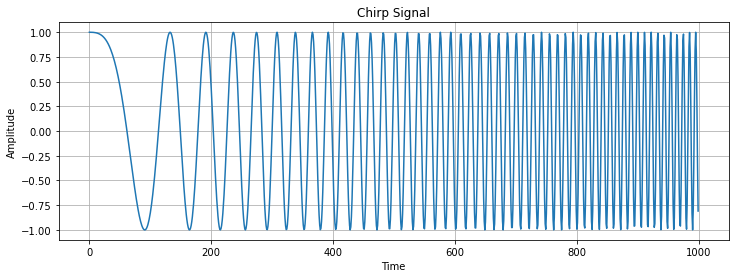

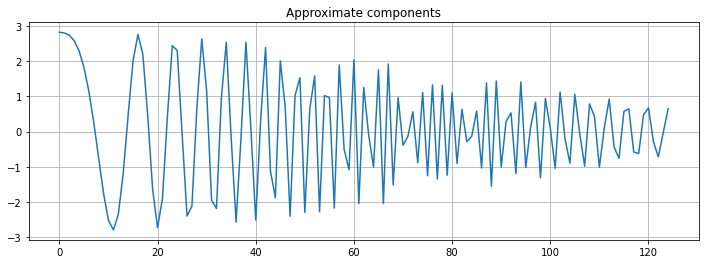

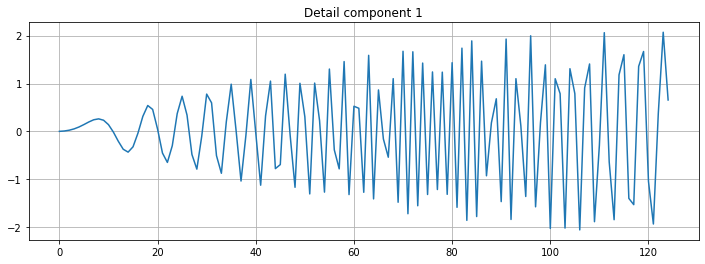

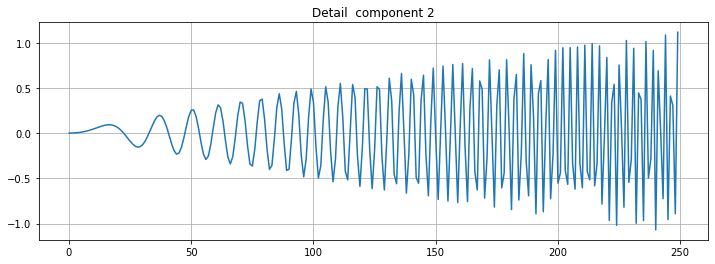

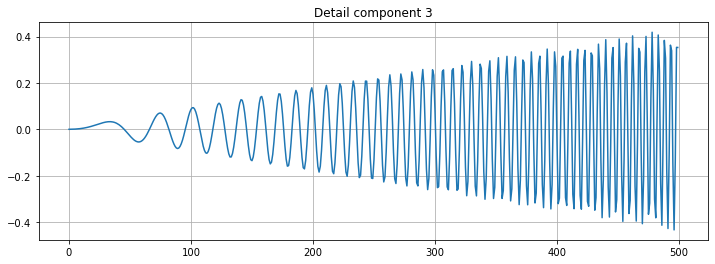

In [45]:
%matplotlib inline
'''generating chirp signal'''
def chirp(f0,f1,t,t1,phase=0):
    
    t0=t[0]
    T=t1-t0
    k=(f1-f0)/T
    x=np.cos(2*np.pi*(k/2*t+f0)*t+phase)
    return x
fs=1000 #sampling frequency
t=np.arange(0,1,1/fs)

f0=1 #intial frequency 
f1=fs/10 #frequency at 1 second
x=chirp(f0,f1,t,1)
fig = plt.figure(figsize=(12,4))

plt.plot(x)
plt.grid()
plt.title('Chirp Signal')
plt.xlabel('Time');
plt.ylabel('Amplitude')
plt.show()

'''Decomposition of signal '''
components = wavedec(x, 'db1', level=3)
a_c,det_c1,det_c2,det_c3=components
fig = plt.figure(figsize=(12,4))

plt.plot(a_c)
plt.grid()
plt.title('Approximate components')
plt.show()
fig = plt.figure(figsize=(12,4))

plt.plot(det_c1)
plt.grid()
plt.title('Detail component 1')
plt.show()
fig = plt.figure(figsize=(12,4))

plt.plot(det_c2)
plt.grid()
plt.title('Detail  component 2')
plt.show()
fig = plt.figure(figsize=(12,4))

plt.plot(det_c3)
plt.grid()
plt.title('Detail component 3')
plt.show()

Que 2- Consider the sample HeaviSine signal in PyWavelets library. The signal
is added with AWGN and a noisy signal is generated with SNR of 15 dB.
(a) Perform Wavelet decomposition on this signal.
(b) Use an appropriate thresholding method to denoise the signal.
(c) Reconstruct the signal and compare it with the original signal

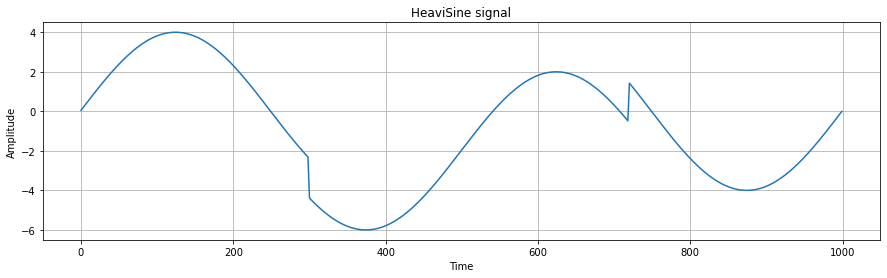

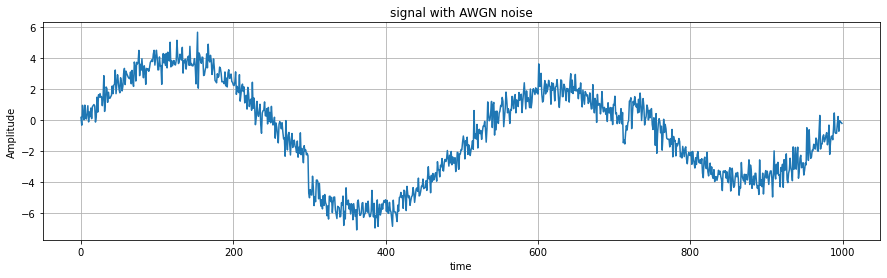

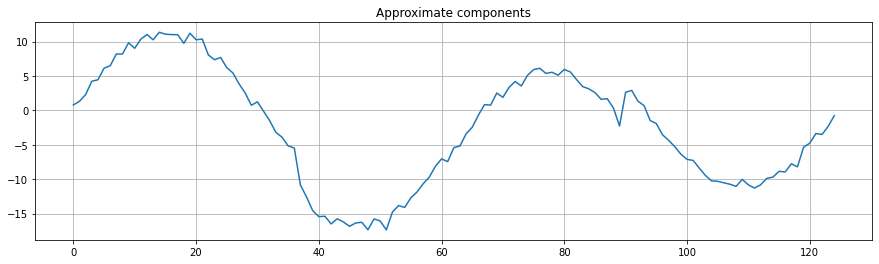

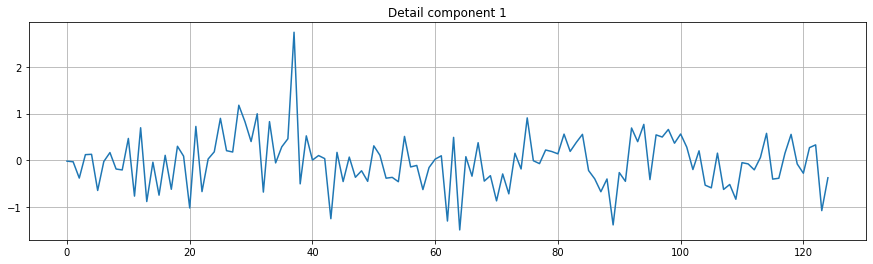

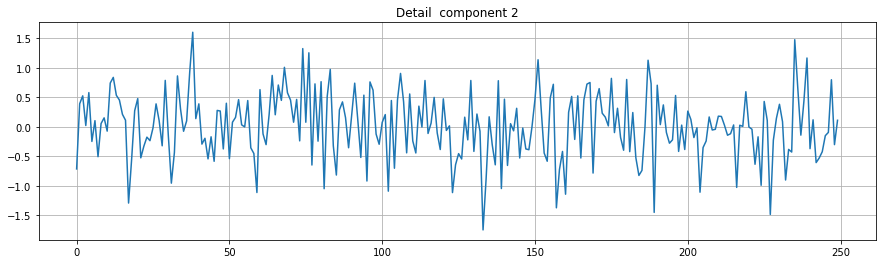

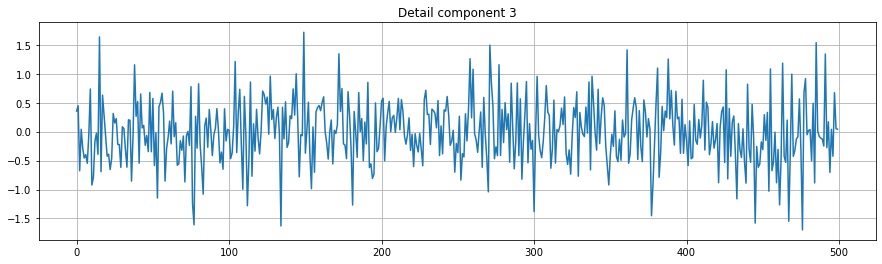

In [46]:
'''Sample HeaviSine signal in PyWavelets library'''
signal=pywt.data.demo_signal('HeaviSine', n=1000)
fig = plt.figure(figsize=(15,4))
plt.plot(signal)
plt.title("HeaviSine signal")
plt.xlabel('Time');
plt.ylabel('Amplitude') 
plt.grid()
plt.show()

sig_watt = signal**2
sig_avg_watt=np.mean(sig_watt)
sig_avg_db = 10*np.log10(sig_avg_watt)
SNR_db = 15 #target SNR
noise_avg_db=sig_avg_db-SNR_db 
SNR_watts = 10**(noise_avg_db/10)   # converting db into watts
# Generating noise singal 
mean= 0
noise_signal  = np.random.normal(mean, np.sqrt(SNR_watts), len(signal))
# Now add pure signal and noise signal
noisy_signal = signal + noise_signal 
fig = plt.figure(figsize=(15,4))
plt.plot(noisy_signal)
plt.title("signal with AWGN noise")
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
'''Wavelet Decomposition of noisy signal '''
components = wavedec(noisy_signal, 'db1', level=3)
a_c,det_c1,det_c2,det_c3=components

fig = plt.figure(figsize=(15,4))
plt.plot(a_c)
plt.grid()
plt.title('Approximate components')
plt.show()

fig = plt.figure(figsize=(15,4))
plt.plot(det_c1)
plt.grid()
plt.title('Detail component 1')
plt.show()

fig = plt.figure(figsize=(15,4))
plt.plot(det_c2)
plt.grid()
plt.title('Detail  component 2')
plt.show()

fig = plt.figure(figsize=(15,4))
plt.plot(det_c3)
plt.grid()
plt.title('Detail component 3')
plt.show()





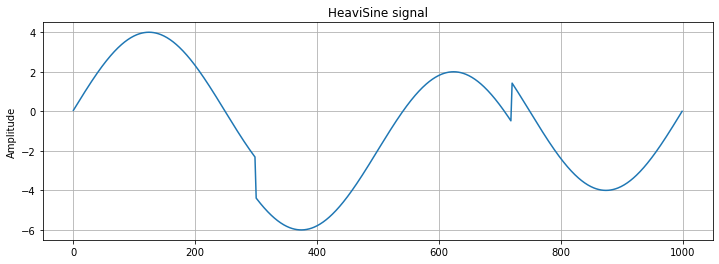

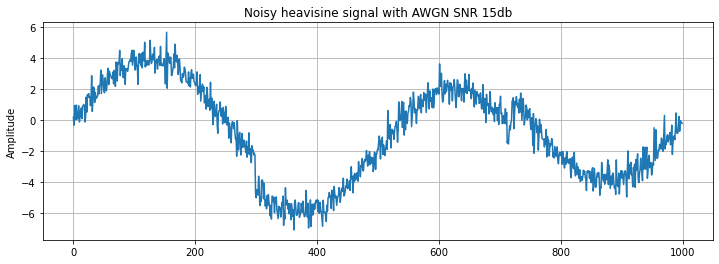

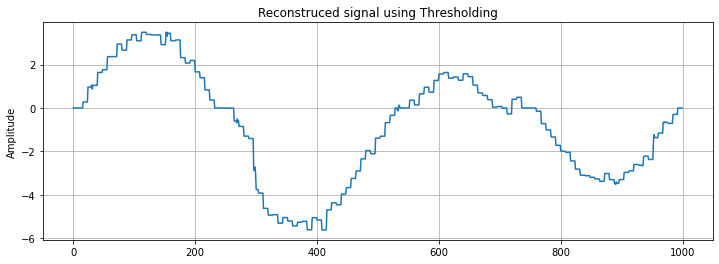

In [47]:
'''Thresholding'''
def sgn(x):
    return 1*(x>0)+0*(x==0)-1*(x<0) 
def threshold(coff,threshol_val):
    return np.array([(sgn(i)*(abs(i)-threshol_val))*(abs(i)>=threshol_val)+0*(abs(i)<threshol_val) for i in coff])
out1=threshold(a_c,1.5)
out2=threshold(det_c1,1.5)
out3=threshold(det_c2,1.5)
out4=threshold(det_c3,1.5)
out_coff=out1,out2,out3,out4
output= waverec(out_coff, 'db1')
plt.figure(figsize=(12,4))
plt.plot(signal)
plt.title('HeaviSine signal')
plt.ylabel( 'Amplitude')
plt.grid()
plt.show()
plt.figure(figsize=(12,4))
plt.plot(noisy_signal)
plt.title('Noisy heavisine signal with AWGN SNR 15db')
plt.ylabel( 'Amplitude')
plt.grid()
plt.show()
plt.figure(figsize=(12,4))
plt.plot(output)
plt.title('Reconstruced signal using Thresholding')
plt.ylabel( 'Amplitude')
plt.grid()
plt.show()

 QUE-3 Download the NASA’s Femto Bearing Dataset from here. This is a dataset
containing high frequency sensor data regarding accelerated degradation
of bearings
(a) Deconstruct the signal and smooth it out (remove high frequency
noise) by using a suitable threshold.
(b) Perform the same operation using Moving Average Filter and compare the result

In [48]:
data = pd.read_csv('C:/data/acc_00001.csv')
x=pd.DataFrame.to_numpy(data.iloc[:,[4]])
y=pd.DataFrame.to_numpy(data.iloc[:,[5]])
z=pd.DataFrame.to_numpy(data.iloc[:,[3]])
a_c_xz,det_c1_xz,det2_c2_xz,det_c3_xz=wavedec(x,'db1',level=3)
'''Thresholding'''
out1_xz=threshold(a_c_xz,1.5)
out2_xz=threshold(det_c1_xz,1.5)
out3_xz=threshold(det_c1_xz,1.5)
out4_xz=threshold(det_c1_xz,1.5)
out_coff_xz=out1_xz,out2_xz,out3_xz,out4_xz
output_xz= waverec(out_coff_xz, 'db1')
approx_det_yz,coeff_det1_yz,coeff_det2_yz,coeff_det3_yz=wavedec(y,'db1',level=3)
out1_yz=threshold(approx_det_yz,1.5)
out2_yz=threshold(coeff_det1_yz,1.5)
out3_yz=threshold(coeff_det2_yz,1.5)
out4_yz=threshold(coeff_det3_yz,1.5)
out_coff_yz=out1_yz,out2_yz,out3_yz,out4_yz
output_yz= waverec(out_coff_yz, 'db1')
print(data)

C:\Users\ajayg\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


      9  39  39.1     65664  0.552  -0.146
0     9  39    39   65703.0  0.501  -0.480
1     9  39    39   65742.0  0.138   0.435
2     9  39    39   65781.0 -0.423   0.240
3     9  39    39   65820.0 -0.802   0.020
4     9  39    39   65859.0 -0.364   0.112
...  ..  ..   ...       ...    ...     ...
2554  9  39    39  165470.0  0.044  -0.094
2555  9  39    39  165510.0 -0.456   0.486
2556  9  39    39  165550.0 -0.885  -0.154
2557  9  39    39  165580.0 -0.230  -0.762
2558  9  39    39  165620.0 -0.134   0.541

[2559 rows x 6 columns]


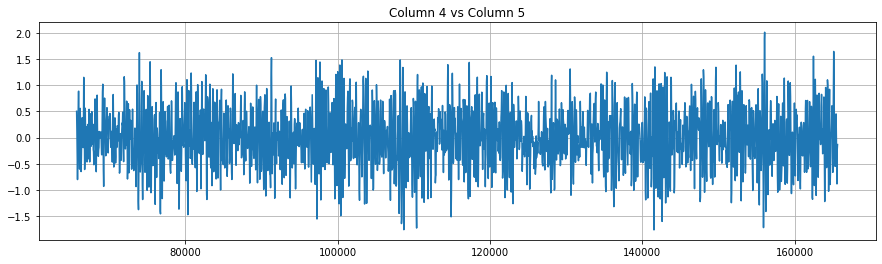

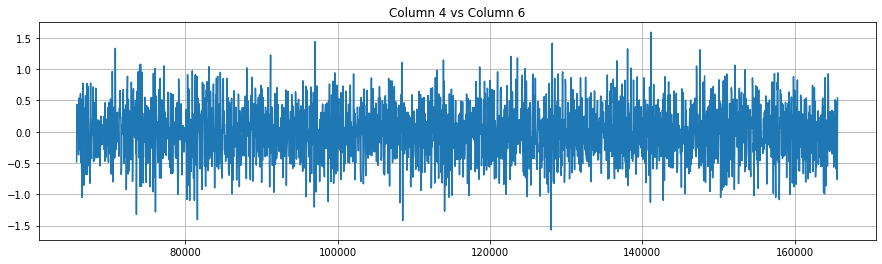

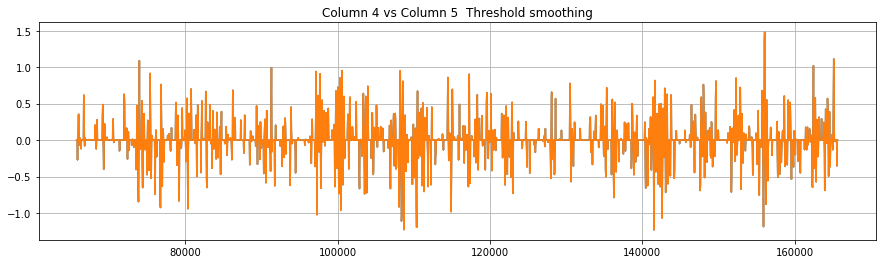

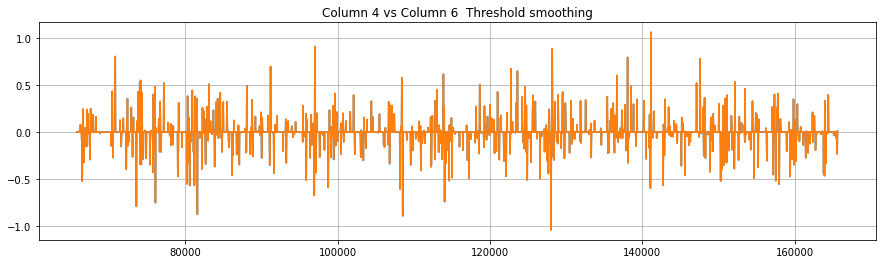

In [50]:
#plotting of columns of the dataset and smoothing it using thresholding

plt.figure(figsize=(15,4))

plt.plot(z,x)
plt.title('Column 4 vs Column 5')
plt.grid('true')
plt.show()
plt.figure(figsize=(15,4))

plt.title('Column 4 vs Column 6')
plt.plot(z,y)
plt.grid('true')
plt.show()
plt.figure(figsize=(15,4))


plt.title('Column 4 vs Column 5  Threshold smoothing')
plt.plot(z,output_xz)
plt.grid('true')
plt.show()

plt.figure(figsize=(15,4))

plt.title('Column 4 vs Column 6  Threshold smoothing')
plt.plot(z,output_yz)
plt.grid('true')